In [118]:
from itertools import combinations
from tqdm import tqdm
import numpy as np
import pickle
import lzma
import os


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [132]:
setups

['concat_G_arrays',
 'concat_G_arrays_random',
 'concat_G_arrays_cpt_random',
 'concat_G_arrays_cpt']

100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


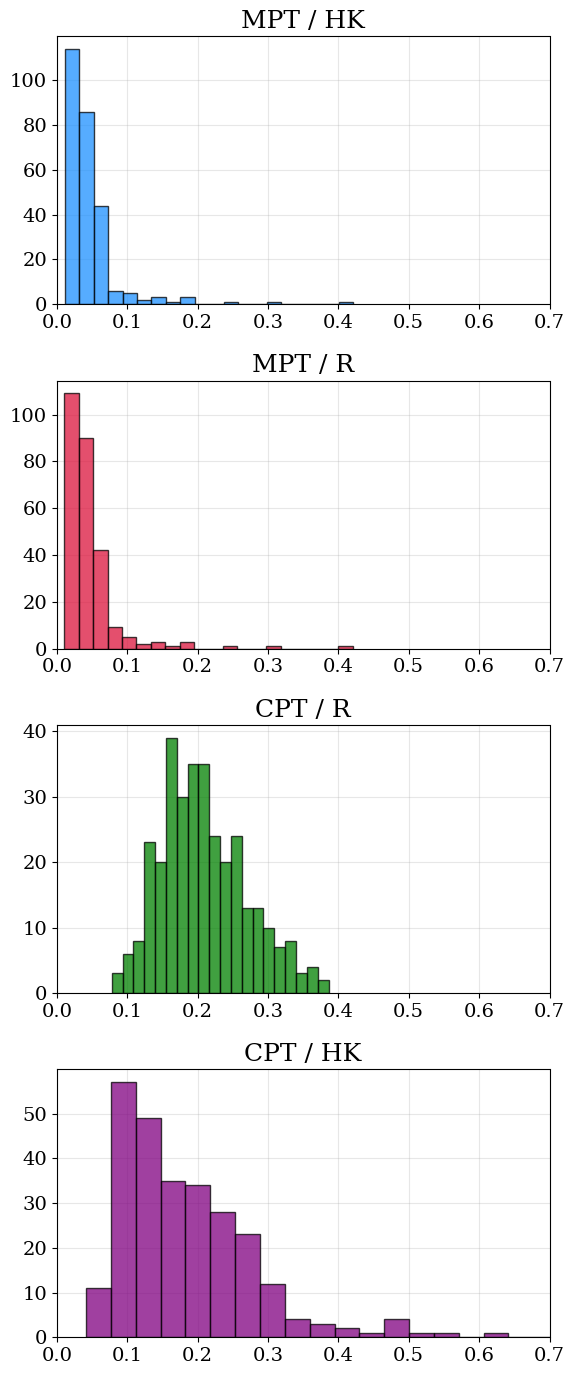

In [135]:
setups = os.listdir("../data/project_returns/")
colors = ["dodgerblue", "crimson", "green", "purple"]
titles = ["MPT / HK", "MPT / R", "CPT / R", "CPT / HK"]

fig, axs = plt.subplots(len(setups),1, figsize=(6,14))

for s_idx, s in enumerate(setups):
    
    summed_project_returns = []
    for f in tqdm(os.listdir("../data/project_returns/" + s)):
        data = pickle.load(lzma.open(f"../data/project_returns/" + s + f"/{f}"))
        sum1 = np.sum(data, axis=2).astype(np.float32)
        sum2 = np.sum(sum1, axis=0)
        summed_project_returns.append(sum2)
        
    concat = np.stack(summed_project_returns)
    concat_summed = np.sum(concat, axis=0)[:-1]
    concat_mean = concat_summed / (9216 * 50 * 10)
    axs[s_idx].hist(list(concat_mean), color=colors[s_idx], edgecolor="k", bins=20, alpha=0.75)
    axs[s_idx].set_title(titles[s_idx])
    axs[s_idx].set_xlim(0, 0.7)
    
fig.tight_layout()
plt.show()